# Análisis de Dominios de Estudios

**Pregunta de Investigación MQ7:** ¿Cuáles son los dominios específicos y áreas temáticas de los estudios incluidos?

Este notebook analiza los dominios específicos y áreas temáticas de los estudios incluidos en la revisión sistemática.

In [1]:
# Configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

# Limpiar los nombres de las columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset cargado: 89 filas y 8 columnas
Columnas disponibles: ['Title', 'Author(s)', 'Year', 'Publication Title', 'Type of Publication', 'Source', 'DOI', 'Abstract']


In [3]:
# Identificar dominios de los estudios
def identify_domains(text):
    if pd.isna(text):
        return []
    
    text_lower = str(text).lower()
    domains = []
    
    # Dominios de IA/ML
    if any(term in text_lower for term in ['artificial intelligence', 'ai', 'machine learning', 'ml']):
        domains.append('Inteligencia Artificial')
    
    if any(term in text_lower for term in ['deep learning', 'neural network', 'cnn', 'rnn', 'lstm']):
        domains.append('Deep Learning')
    
    if any(term in text_lower for term in ['predictive', 'prediction', 'forecasting']):
        domains.append('Predicción')
    
    if any(term in text_lower for term in ['classification', 'clustering', 'supervised', 'unsupervised']):
        domains.append('Clasificación')
    
    # Dominios de educación matemática
    if any(term in text_lower for term in ['algebra', 'algebraic']):
        domains.append('Álgebra')
    
    if any(term in text_lower for term in ['geometry', 'geometric']):
        domains.append('Geometría')
    
    if any(term in text_lower for term in ['calculus', 'derivative', 'integral']):
        domains.append('Cálculo')
    
    if any(term in text_lower for term in ['statistics', 'statistical', 'probability']):
        domains.append('Estadística')
    
    if any(term in text_lower for term in ['arithmetic', 'basic math', 'elementary']):
        domains.append('Aritmética')
    
    # Dominios de nivel educativo
    if any(term in text_lower for term in ['elementary', 'primary', 'k-5', 'k-6']):
        domains.append('Educación Primaria')
    
    if any(term in text_lower for term in ['middle school', 'secondary', 'k-8', 'k-9']):
        domains.append('Educación Secundaria')
    
    if any(term in text_lower for term in ['high school', 'k-12']):
        domains.append('Educación Media')
    
    return domains

# Aplicar identificación de dominios
df['domains'] = df['Title'].apply(identify_domains)
df['domains_abstract'] = df['Abstract'].apply(identify_domains)

print("Dominios identificados en títulos y abstracts")

Dominios identificados en títulos y abstracts


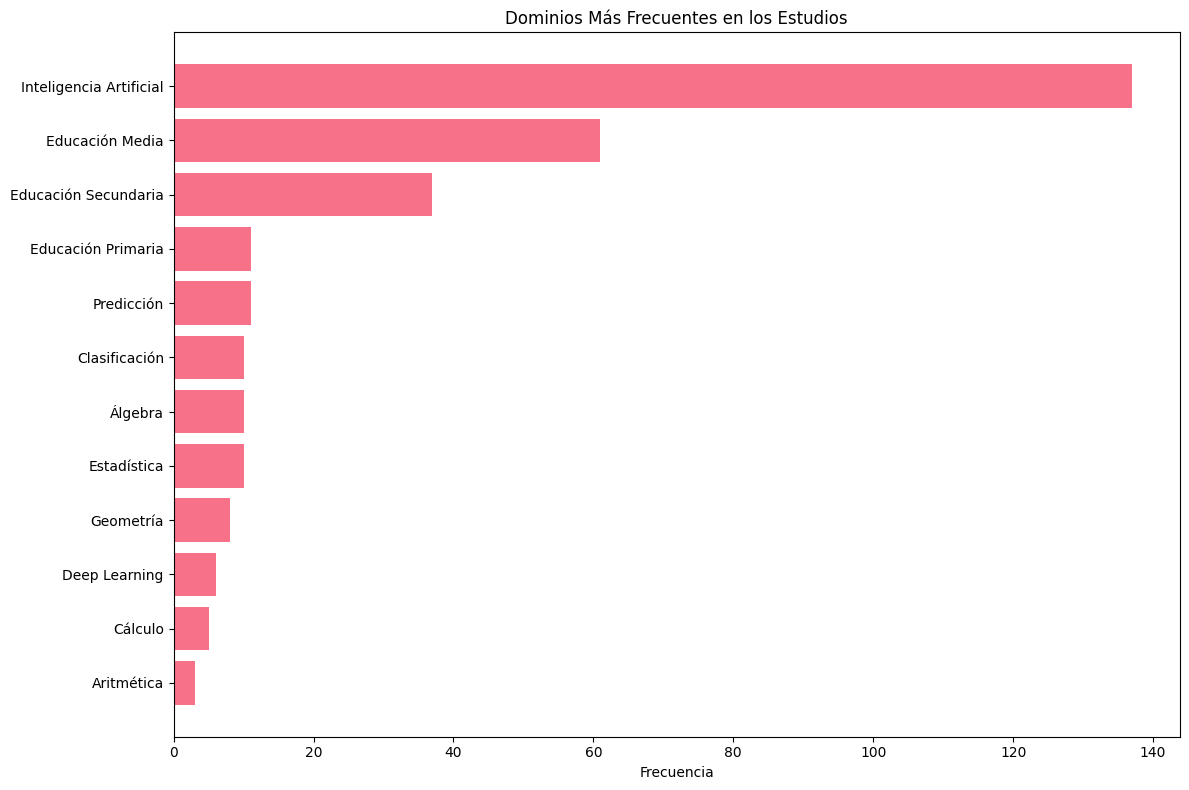

In [4]:
# Análisis de frecuencia de dominios
all_domains = []
for domains in df['domains']:
    all_domains.extend(domains)
for domains in df['domains_abstract']:
    all_domains.extend(domains)

# Contar frecuencia
domain_freq = Counter(all_domains)
most_common_domains = domain_freq.most_common(15)

# Visualizar dominios más frecuentes
domains, counts = zip(*most_common_domains)

plt.figure(figsize=(12, 8))
plt.barh(range(len(domains)), counts)
plt.yticks(range(len(domains)), domains)
plt.xlabel('Frecuencia')
plt.title('Dominios Más Frecuentes en los Estudios')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()